## 1 Описание задачи

Телеком провайдер «Нупозвони» ищет бомбических аналитиков! 

Наши клиенты − колл-центры, мы хотим помочь им найти неэффективных операторов, и предложить новый сервис для регулярного мониторинга. Для этого мы возем предоставленый датасет по всем колцентрам, обработаем данные, проанализируем, выявим зависимости и составим критерии эффективности и неэфективности, применим на существующую статитику и вынесим вердикт Конечная цель этого иследования что бы мы могли эффективно оценивать работу КЦ . 

Заказчик планирует применить исследование, что бы понять на сколько эффективно внедрение эффективных и неэффективных оператор, и внедрять эту технологию или нет Ниже предоставлена декомпозиция задачи



##   Предварительный анализ данных:

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, ttest_ind
import scipy.stats as stats
import plotly.express as px

In [4]:
#напишем функцию для первичного анализа датасета
def check_data_modify(data_df):
    print('\033[1m' + 'Изучим исходные данные' + '\033[0m')
    data_df.info()
    print('Размер датасета:', data_df.shape)

    print('*' * 50)
    missed_rows = sum(data_df.isnull().sum(axis=1) > 0) / data_df.shape[0]
    print('\033[1m' + 'Проверка пропусков' + '\033[0m')
    print('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    print('*' * 50)
    print('\033[1m' + 'Проверка на дубликаты' + '\033[0m')
    print('Количество полных дубликатов:', data_df.duplicated().sum())

    print('*' * 50)
    print('\033[1m' + 'Первые пять строк датасета' + '\033[0m')
    display(data_df.head())


In [5]:
#функция проверки пропусков в дф
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("Все столбцы не содержат пропущенных значений.")
    else:
        print("Столбцы с пропущенными значениями:")
        for column, count in missing_values.items():
            if count > 0:
                print(f"{column}: {count} пропущенных значений")

###   Загрузить данные из файлов telecom_dataset.csv.zip .Изучить структуру и содержание данных.

In [6]:
#читаем файл
df=pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

In [7]:
display(df)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [8]:
check_data_modify(df)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
Размер датасета: (53902, 9)
**************************************************
Проверка пропусков
Доля строк содержащих пропуски: 15.3%
**************************************************
Проверка на дубликаты
Количество полных дубликатов: 4900
****

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


###  Проверим наличие пропущенных и дублирующих значений и обработать их при необходимости.

In [9]:
#удалим полные дубликаты
df=df.drop_duplicates()

In [10]:
#проверим на пропуски
check_missing_values(df)

Столбцы с пропущенными значениями:
internal: 110 пропущенных значений
operator_id: 7456 пропущенных значений


In [11]:
#пропуски internal заменим на -1
df_copy = df.copy()
df_copy['internal'] = df_copy['internal'].fillna(-1)

#пропуски operator_id заменим на 0
df_copy['operator_id'] = df_copy['operator_id'].fillna(0)

#проверим пропуски в дф
check_missing_values(df_copy)

Все столбцы не содержат пропущенных значений.


Думаю раз operator_id имеет пропущенные значения, а нам эти данные(operator_id) важны для определения качества работы оператора, то без идентификатора операторам мы не сможем ничего проанлизировать.Стоит удалить данные и пропуски вмете с ними, и работать с очищенным дф

Рассмотрим как распределены такие операторы по колл-центрам

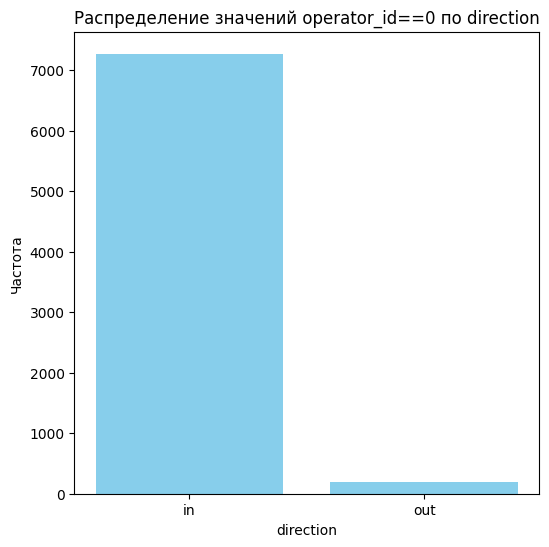

In [12]:

# Создание подвыборки с условием operator_id == 0
sub_df = df_copy[df_copy['operator_id'] == 0]

# Группировка значений по direction и подсчет их количества
grouped_data = sub_df.groupby('direction').size()

# Построение столбцов
plt.figure(figsize=(6, 6))
plt.bar(grouped_data.index, grouped_data, color='skyblue')
plt.xlabel('direction')
plt.ylabel('Частота')
plt.title('Распределение значений operator_id==0 по direction')

plt.show()


In [13]:
display(grouped_data)

direction
in     7270
out     186
dtype: int64

In [14]:
#удаляем пропуски где неизвестен оператор
df_copy = df_copy[df_copy['operator_id'] != 0]

### Произвести первичную обработку данных, включая преобразование типов данных 

In [15]:
# Преобразование данных в верный формат
df_copy = df_copy.astype({
    'date': 'datetime64',
    'internal': bool,
    'operator_id': int
})

In [16]:
#изучим датасет
check_data_modify(df_copy)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41546 non-null  int64         
 1   date                 41546 non-null  datetime64[ns]
 2   direction            41546 non-null  object        
 3   internal             41546 non-null  bool          
 4   operator_id          41546 non-null  int32         
 5   is_missed_call       41546 non-null  bool          
 6   calls_count          41546 non-null  int64         
 7   call_duration        41546 non-null  int64         
 8   total_call_duration  41546 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 2.5+ MB
Размер датасета: (41546, 9)
**************************************************
Проверка пропусков
Доля строк содержащих пропуски: 0.0%
*******************

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-04 21:00:00,out,True,880022,True,3,0,5
2,166377,2019-08-04 21:00:00,out,True,880020,True,1,0,1
3,166377,2019-08-04 21:00:00,out,True,880020,False,1,10,18
4,166377,2019-08-04 21:00:00,out,False,880022,True,3,0,25
5,166377,2019-08-04 21:00:00,out,False,880020,False,2,3,29


Предобработка завешена, можно приступать к анализу критериев эффективности операторов

## Анализ эффективности операторов:

### Рассмотрм основные признаки, связанные с эффективностью операторов, такие как количество пропущенных входящих вызовов, длительность ожидания ответа при входящих вызовах и длительность разговора

Для оценки эффективности оператора в данной задаче можно рассмотреть следующие критерии:

1 Пропущенные вызовы: Количество пропущенных вызовов, в % отношении к общему числу входящих, может быть показателем низкой эффективности оператора. Можно проверить, сколько вызовов было пропущено каждым оператором и сравнить эту метрику между операторами.

2 Время ожидания: Длительность ожидания ответа при входящих вызовах может указывать на эффективность оператора. Можно рассчитать среднее время ожидания ответа для каждого оператора и сравнить его.

3 Длительность звонков: Длительность звонков может быть связана с эффективностью оператора. Можно рассчитать среднюю длительность звонков для каждого оператора и сравнить.


#### Критерий КОЛИЧЕСТВО ПРОПУЩЕННЫХ

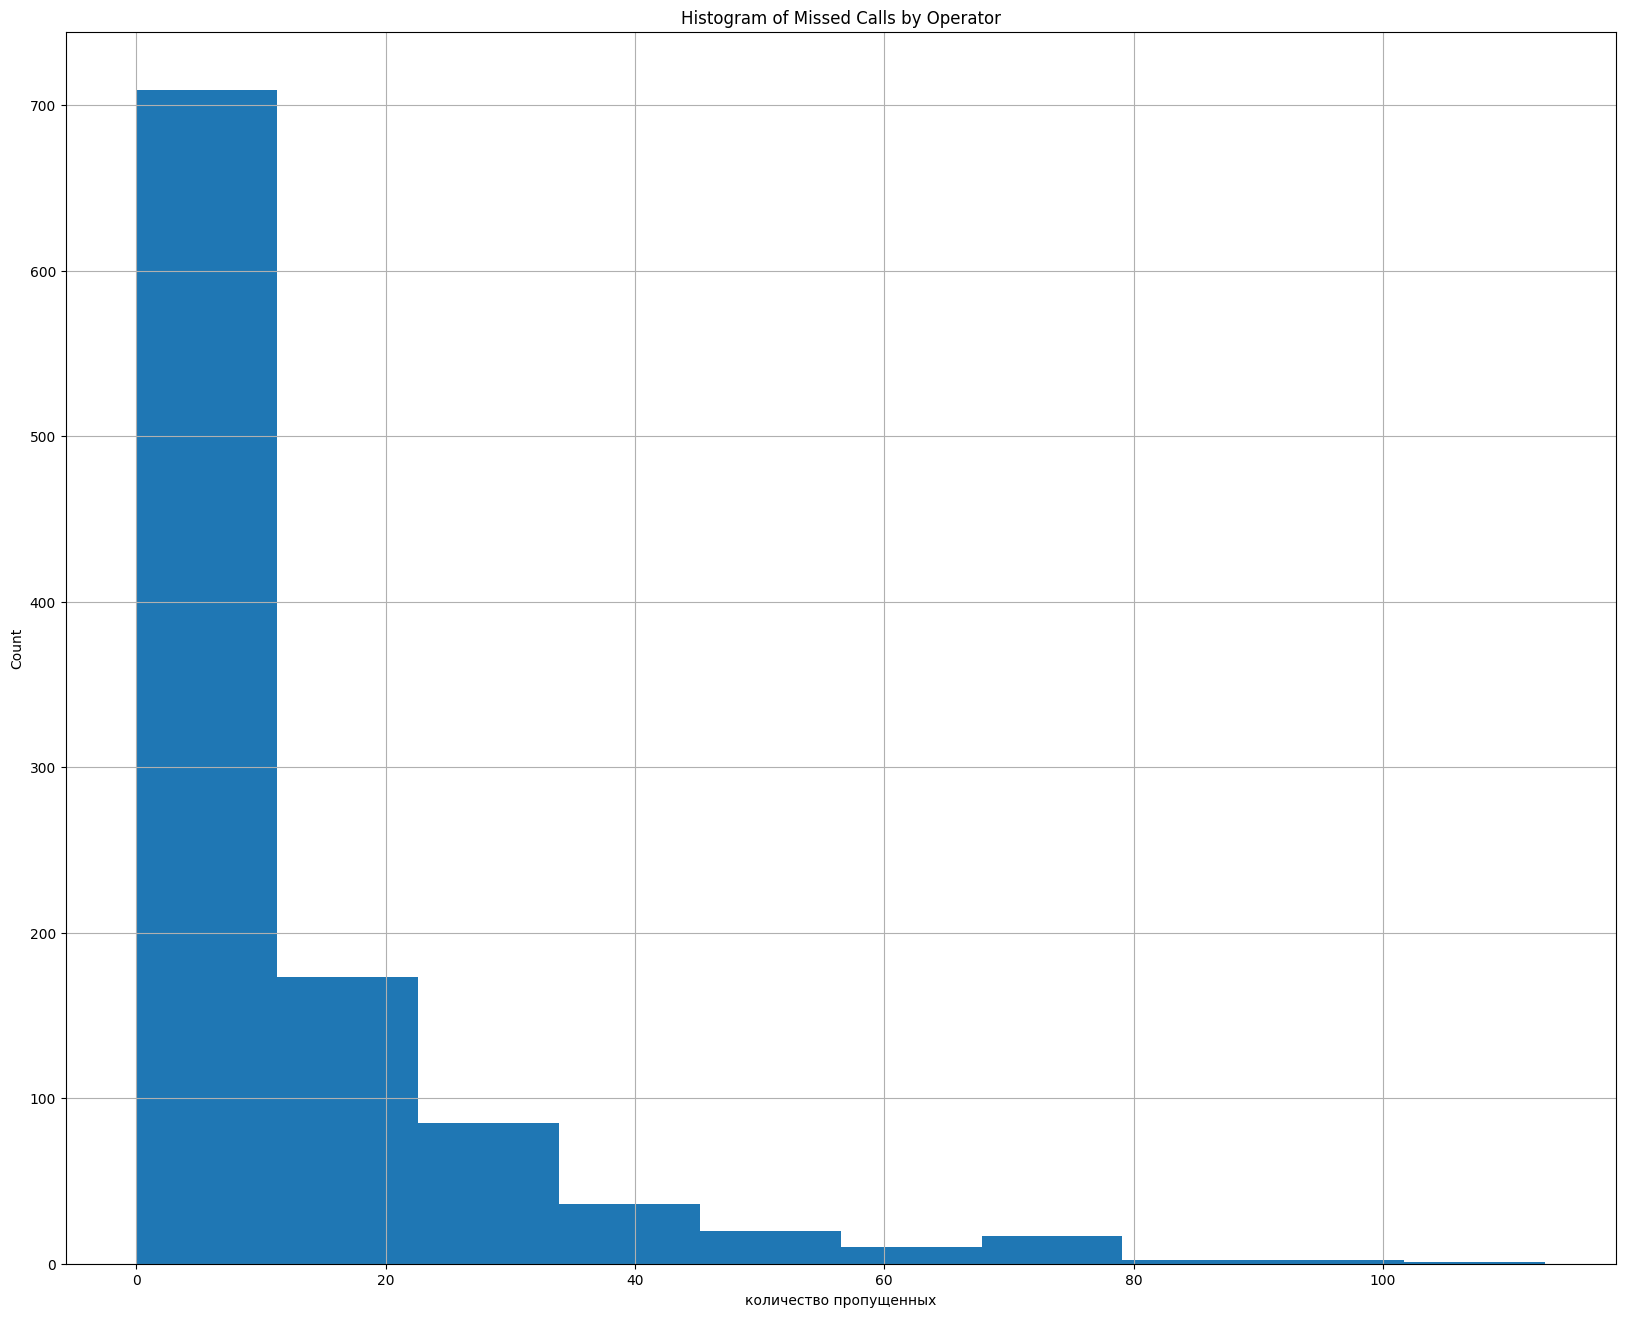

In [17]:
total_missed_calls_by_operator = df_copy[df_copy['internal'] == False].groupby('operator_id')['is_missed_call'].sum()
total_missed_calls_by_operator = total_missed_calls_by_operator.sort_values(ascending=True)

plt.figure(figsize=(20, 16))
total_missed_calls_by_operator.hist()
plt.xlabel('количество пропущенных')
plt.ylabel('Count')
plt.title('Гистограмма пропущенных вызовов по операторам')
plt.show()

In [18]:
# Подсчет количества уникальных значений 'operator_id'
unique_operators = df_copy['operator_id'].nunique()
# Вывод результата
print("Количество уникальных операторов:", unique_operators)

Количество уникальных операторов: 1092


In [19]:
# Группировка по операторам и подсчет общего количества пропущенных вызовов
total_missed_calls_by_operator = df_copy[df_copy['internal'] == False].groupby('operator_id')['is_missed_call'].sum()

# Группировка по операторам и подсчет общего количества вызовов
total_calls_by_operator = df_copy[df_copy['internal'] == False].groupby('operator_id')['calls_count'].sum()

# Создание DataFrame с операторами и их пропущенными вызовами
df_missed_calls_ratio = pd.DataFrame({'operator_id': total_missed_calls_by_operator.index,
                                      'total_missed_calls': total_missed_calls_by_operator.values,
                                      'total_calls': total_calls_by_operator.values})

# Добавление столбца 'missed_calls_ratio' с процентом пропущенных вызовов
df_missed_calls_ratio['missed_calls_ratio'] = df_missed_calls_ratio['total_missed_calls'] / df_missed_calls_ratio['total_calls']
df_missed_calls_ratio['missed_calls_ratio'] = df_missed_calls_ratio['missed_calls_ratio'].round(3) * 100
# Сортировка по столбцу 'missed_calls_percent' в порядке убывания
df_missed_calls_ratio = df_missed_calls_ratio.sort_values('missed_calls_ratio', ascending=False)


# Вывод результата
print(df_missed_calls_ratio)

      operator_id  total_missed_calls  total_calls  missed_calls_ratio
684        937778                   1            1               100.0
859        947480                   1            1               100.0
681        937770                   1            1               100.0
699        937872                   1            1               100.0
252        905570                   3            3               100.0
...           ...                 ...          ...                 ...
369        914172                   0            6                 0.0
163        899892                   0            3                 0.0
603        931914                   0           31                 0.0
599        930910                   0           12                 0.0
1054       973286                   0            2                 0.0

[1055 rows x 4 columns]


In [20]:
df_missed_calls_ratio['missed_calls_ratio'].describe()

count    1055.000000
mean        8.734123
std        16.318764
min         0.000000
25%         0.600000
50%         3.300000
75%         9.600000
max       100.000000
Name: missed_calls_ratio, dtype: float64

Будем считать критерий эффективности % пропущеных значений это больше или равно 9.6% пропущеных от общего числа звонков

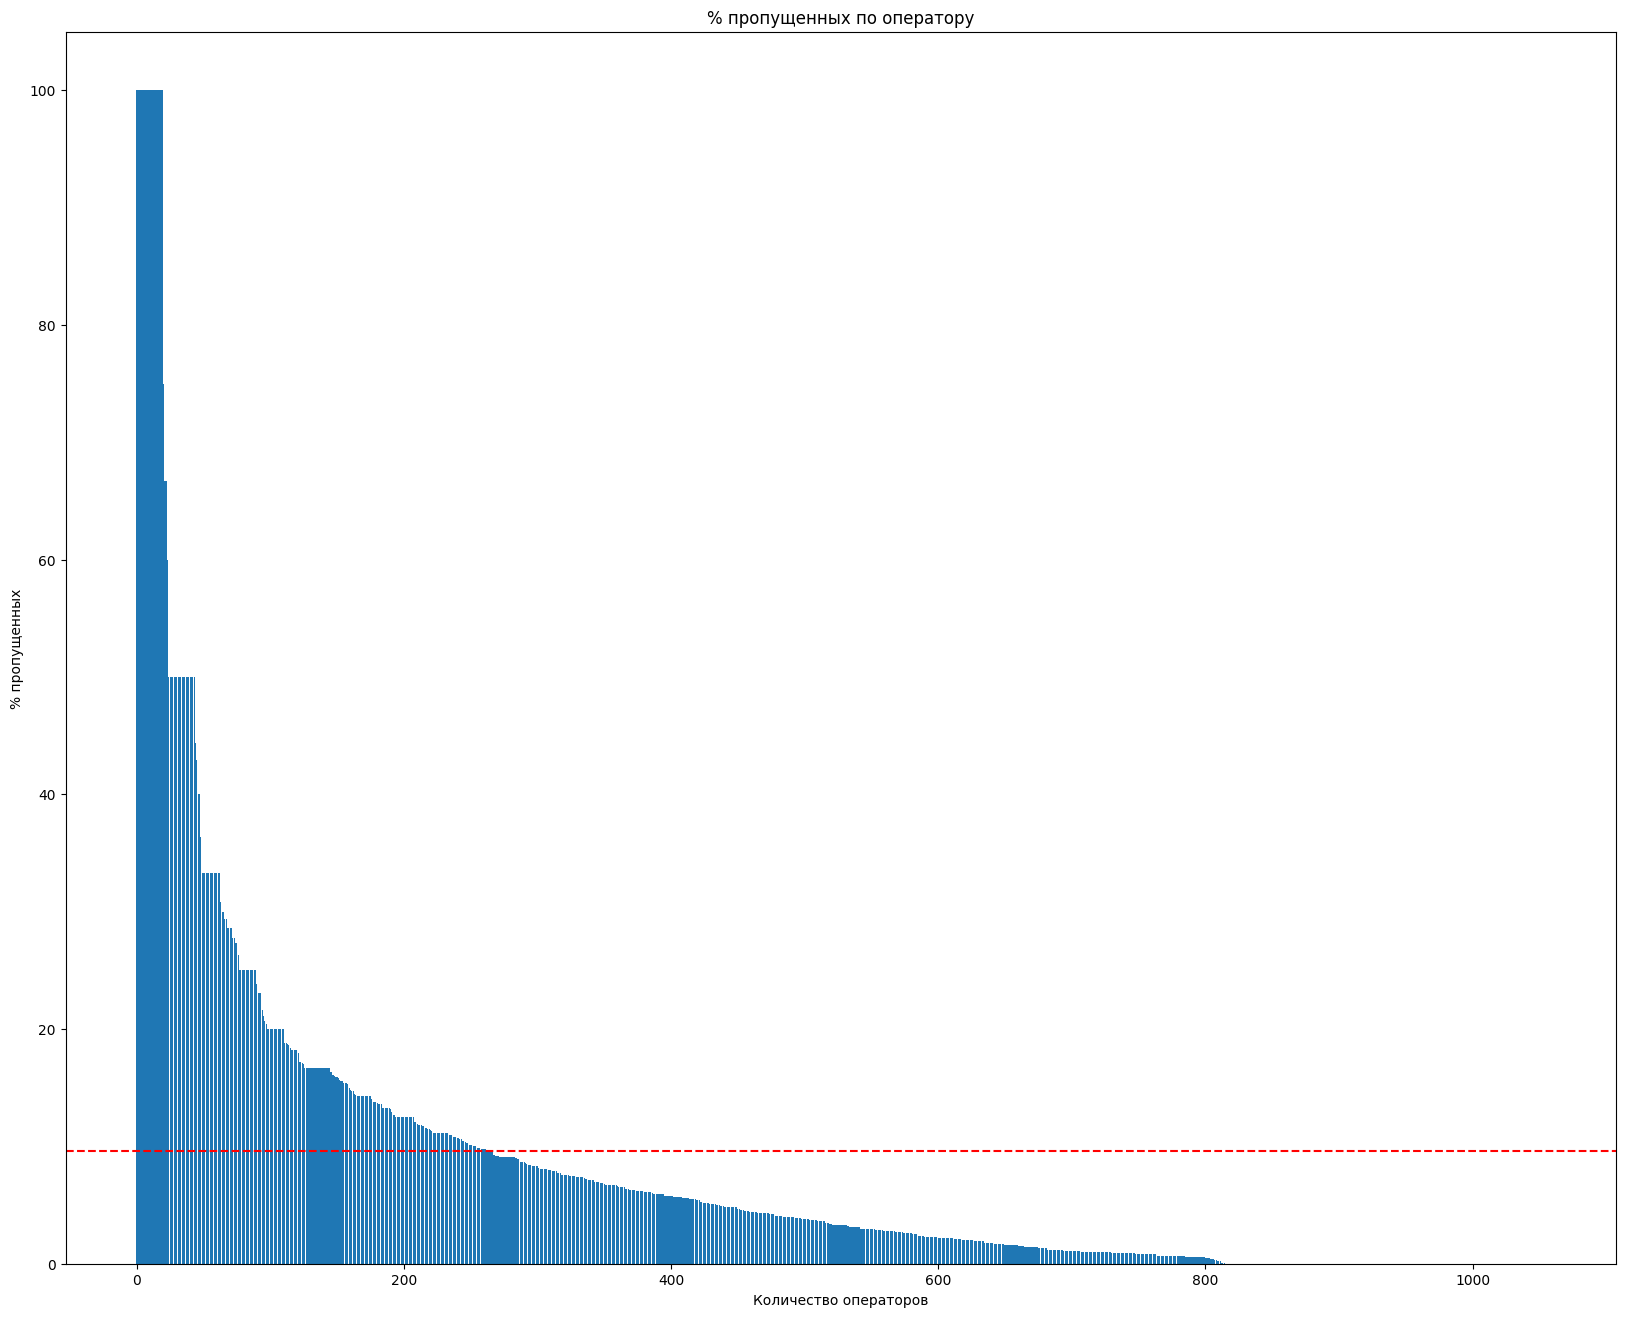

In [21]:
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_missed_calls_ratio)), df_missed_calls_ratio['missed_calls_ratio'])
plt.axhline(y=9.6, color='red', linestyle='--')  # Горизонтальная линия на уровне 9.6
plt.xlabel('Количество операторов')
plt.ylabel('% пропущенных')
plt.title('% пропущенных по оператору')
plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
По оси `x` всё же не количество операторов, а аналоги порядковых номеров

</div>

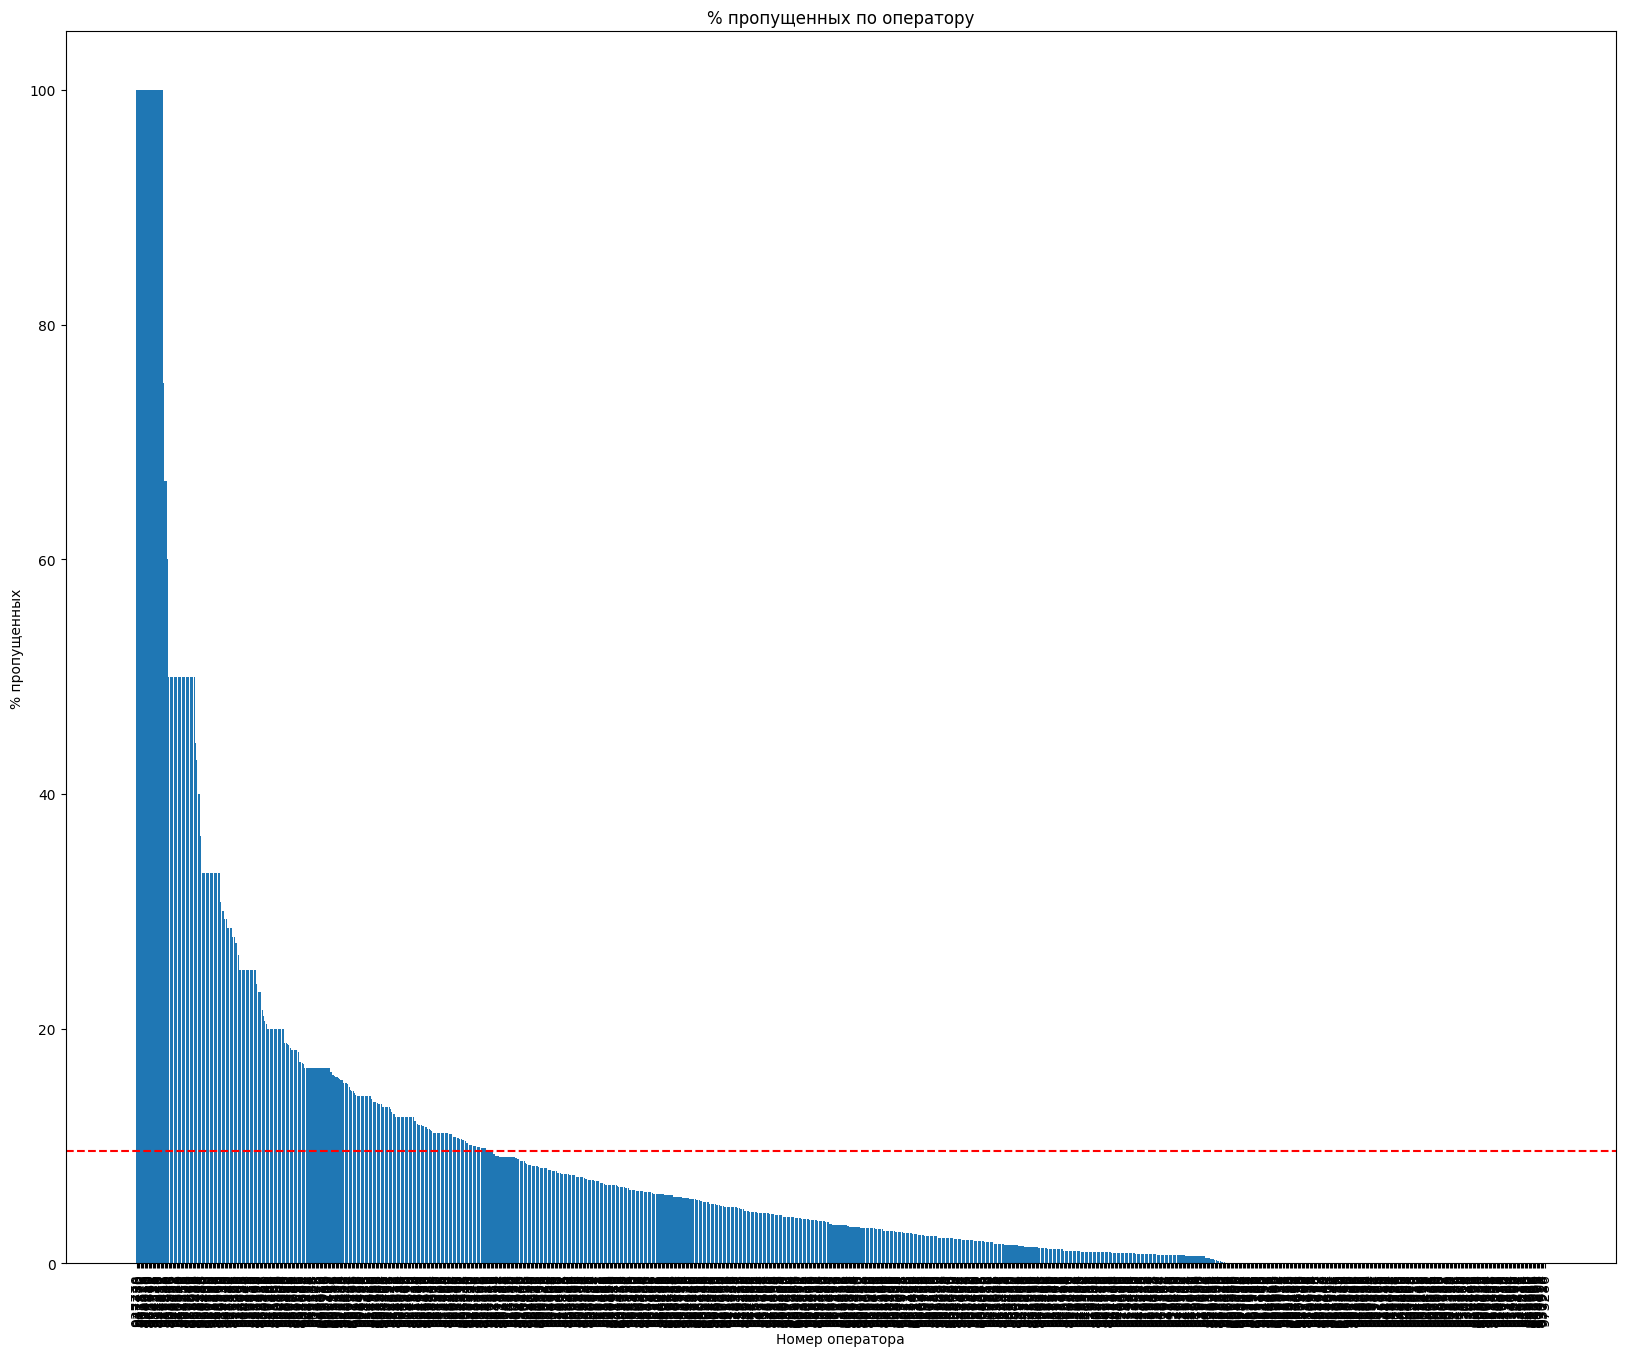

In [22]:
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_missed_calls_ratio)), df_missed_calls_ratio['missed_calls_ratio'])
plt.axhline(y=9.6, color='red', linestyle='--')  # Горизонтальная линия на уровне 9.6
plt.xlabel('Номер оператора')  # Здесь замените на название столбца с номерами операторов
plt.ylabel('% пропущенных')
plt.title('% пропущенных по оператору')
plt.xticks(range(len(df_missed_calls_ratio)), df_missed_calls_ratio['operator_id'], rotation=90)  
plt.show()

In [23]:
# Фильтрация данных по условию missed_calls_ratio >=  9.6
df_filtered = df_missed_calls_ratio[df_missed_calls_ratio['missed_calls_ratio'] >=  9.6]

# Вычисление отношения в процентах
ratio = round((len(df_filtered) / unique_operators) * 100, 2)

# Вывод отношения
print("Отношение операторов, удовлетворяющих условию, к общему числу операторов:", ratio, "%")


Отношение операторов, удовлетворяющих условию, к общему числу операторов: 24.18 %


1 критерий % пропущеных ко всем принятым вызовам должен быть не менее 9.6 %

#### Критерий ВРЕМЯ ОЖИДАНИЯ

Длительность ожидания ответа при входящих вызовах может указывать на эффективность оператора. Можно рассчитать среднее время ожидания ответа для каждого оператора и сравнить его.

In [24]:
# Фильтрация данных только для входящих вызовов и не для пропущеных
df_incoming_calls = df_copy[(df_copy['direction'] == 'in') & (df_copy['is_missed_call'] == False)].copy()

# Вычисление времени ожидания ответа для каждого оператора
df_incoming_calls['wait_time'] = df_incoming_calls['total_call_duration'] - df_incoming_calls['call_duration']
# Группировка по операторам и вычисление среднего времени ожидания ответа
mean_wait_time_by_operator = df_incoming_calls.groupby('operator_id')['wait_time'].mean()
# Создание DataFrame с операторами и их средним временем ожидания ответа
df_mean_wait_time = pd.DataFrame({'operator_id': mean_wait_time_by_operator.index, 'mean_wait_time': mean_wait_time_by_operator.values})
# Сортировка по среднему времени ожидания ответа в порядке убывания
df_mean_wait_time = df_mean_wait_time.sort_values('mean_wait_time', ascending=False)

In [25]:
df_mean_wait_time

,operator_id,mean_wait_time
337,919794,1039.322581
206,906070,1018.384615
335,919790,866.803279
445,931458,834.500000
328,919204,774.166667
...,...,...
404,926872,1.333333
676,952982,1.166667
674,952954,1.000000
643,949420,1.000000


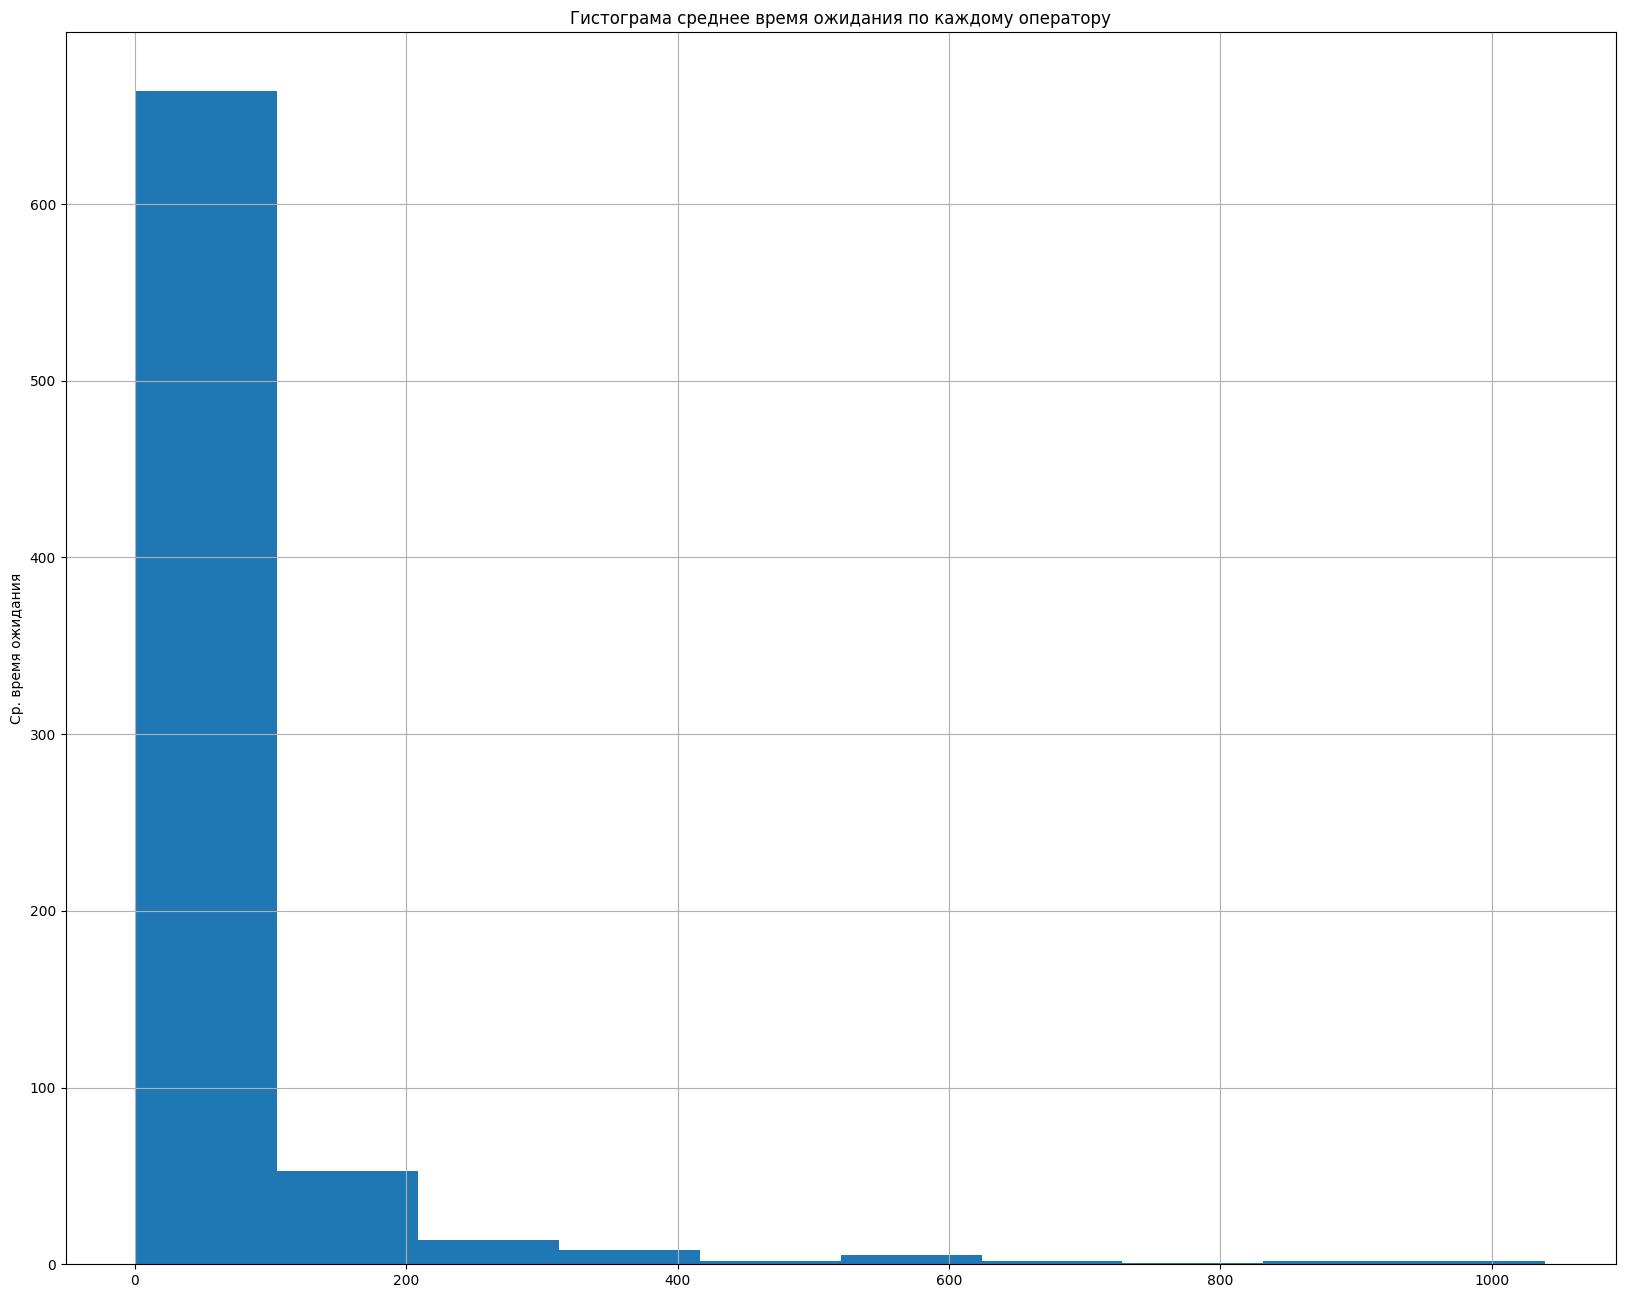

In [26]:
plt.figure(figsize=(20, 16))
df_mean_wait_time['mean_wait_time'].hist()

plt.ylabel('Ср. время ожидания')
plt.title('Гистограма среднее время ожидания по каждому оператору')
plt.show()

In [27]:
#проанализируем дф по операторам и вычисление среднего времени ожидания ответа
df_mean_wait_time['mean_wait_time'].describe()

count     753.000000
mean       61.658829
std       107.011830
min         1.000000
25%        17.888889
50%        31.125000
75%        59.489362
max      1039.322581
Name: mean_wait_time, dtype: float64

 В нашем случае можно взять критерий-район 50% процититиль, все что выше это уже не эфективность

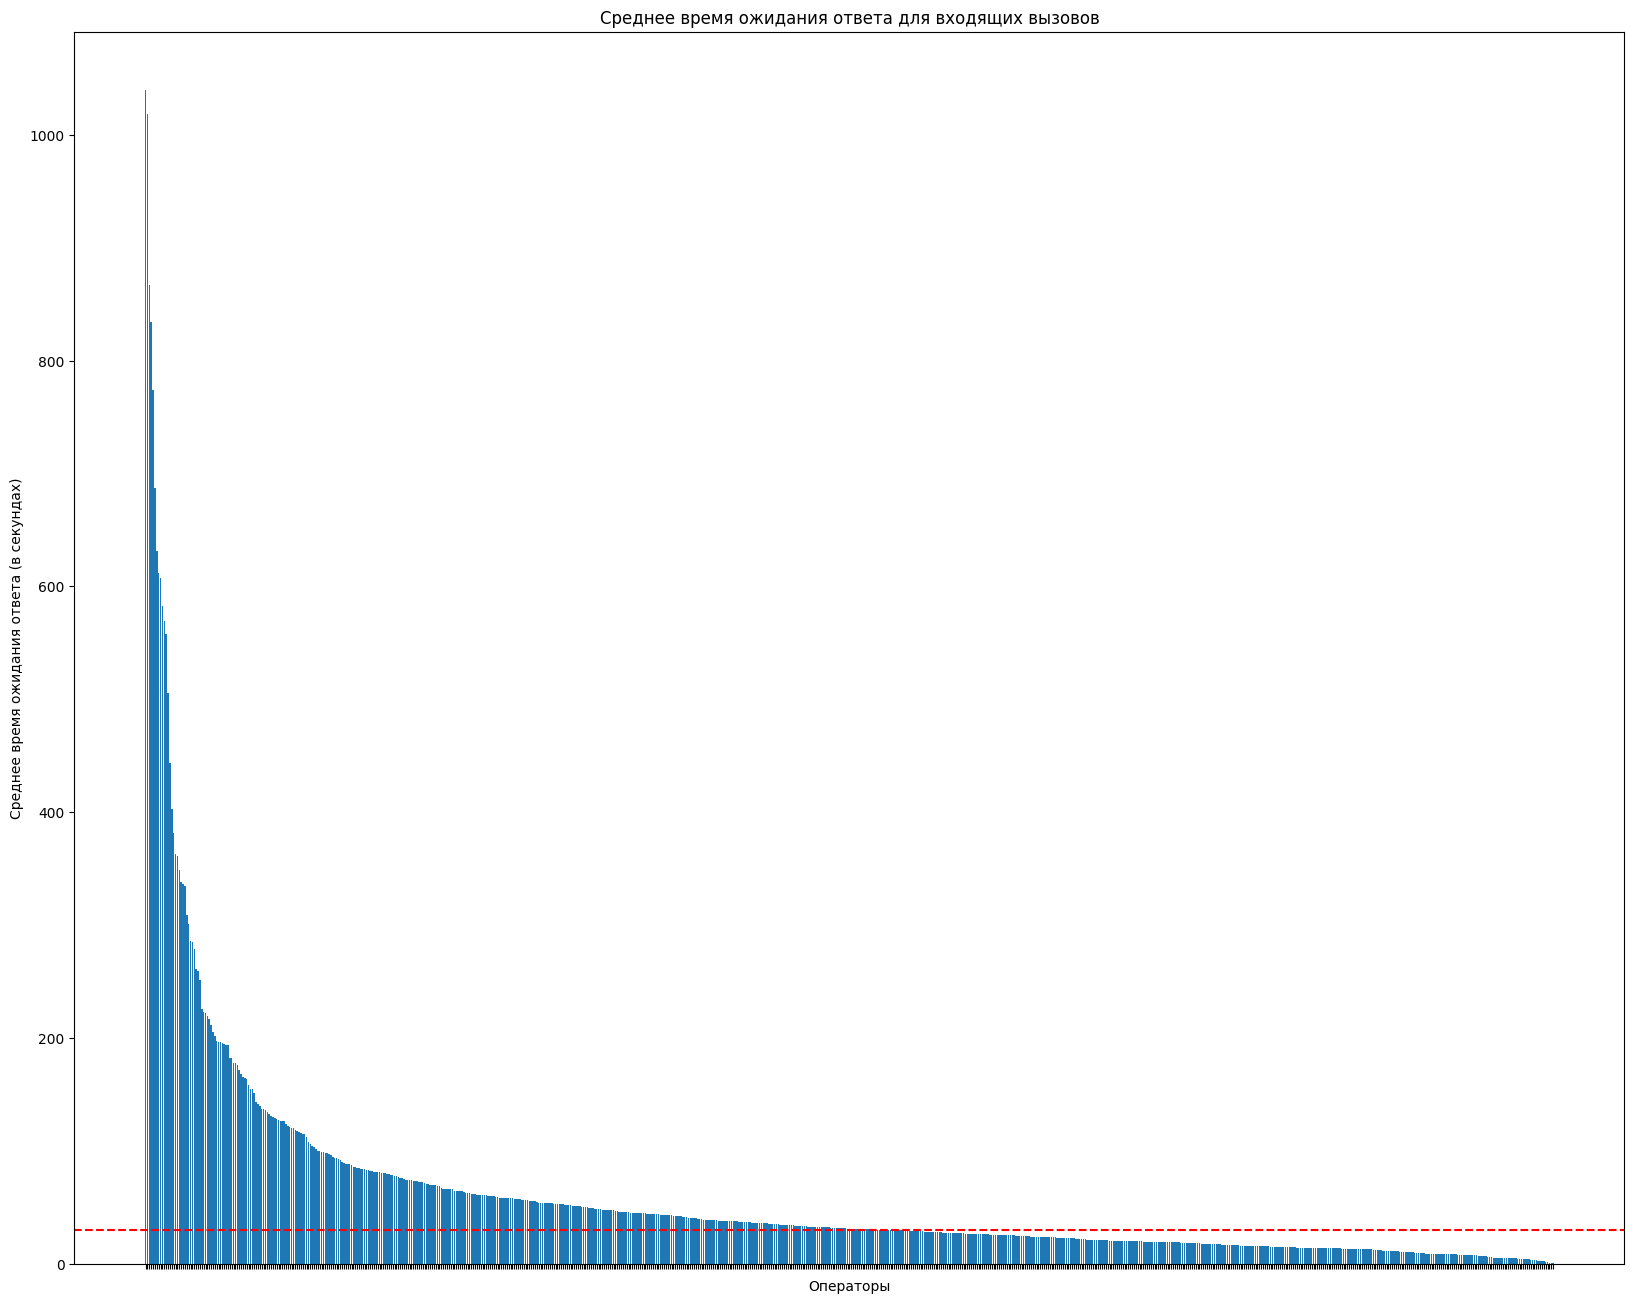

In [28]:
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_mean_wait_time)), df_mean_wait_time['mean_wait_time'])
plt.axhline(y=30, color='red', linestyle='--')  # Горизонтальная линия на уровне 30
plt.xlabel('Операторы')
plt.ylabel('Среднее время ожидания ответа (в секундах)')
plt.title('Среднее время ожидания ответа для входящих вызовов')
plt.xticks(range(len(df_mean_wait_time)), [])
plt.show()

In [30]:
df_mean_wait_time

,operator_id,mean_wait_time
337,919794,1039.322581
206,906070,1018.384615
335,919790,866.803279
445,931458,834.500000
328,919204,774.166667
...,...,...
404,926872,1.333333
676,952982,1.166667
674,952954,1.000000
643,949420,1.000000


In [31]:
# Фильтрация данных по условию mean_wait_time >=  30
df_mean_wait_time_sort = df_mean_wait_time[df_mean_wait_time['mean_wait_time'] >= 30]


# Вычисление отношения в процентах
ratio_wait = round((len(df_mean_wait_time_sort) / 754) * 100, 2)

# Вывод отношения
print("Отношение операторов, удовлетворяющих условию, к общему числу операторов:", ratio_wait, "%")

Отношение операторов, удовлетворяющих условию, к общему числу операторов: 52.92 %


2 критерий. Время ожидания входящих не более 30 сек

#### Критерий ДЛИТЕЛЬНОСТЬ РАЗГОВОРА

<Axes: >

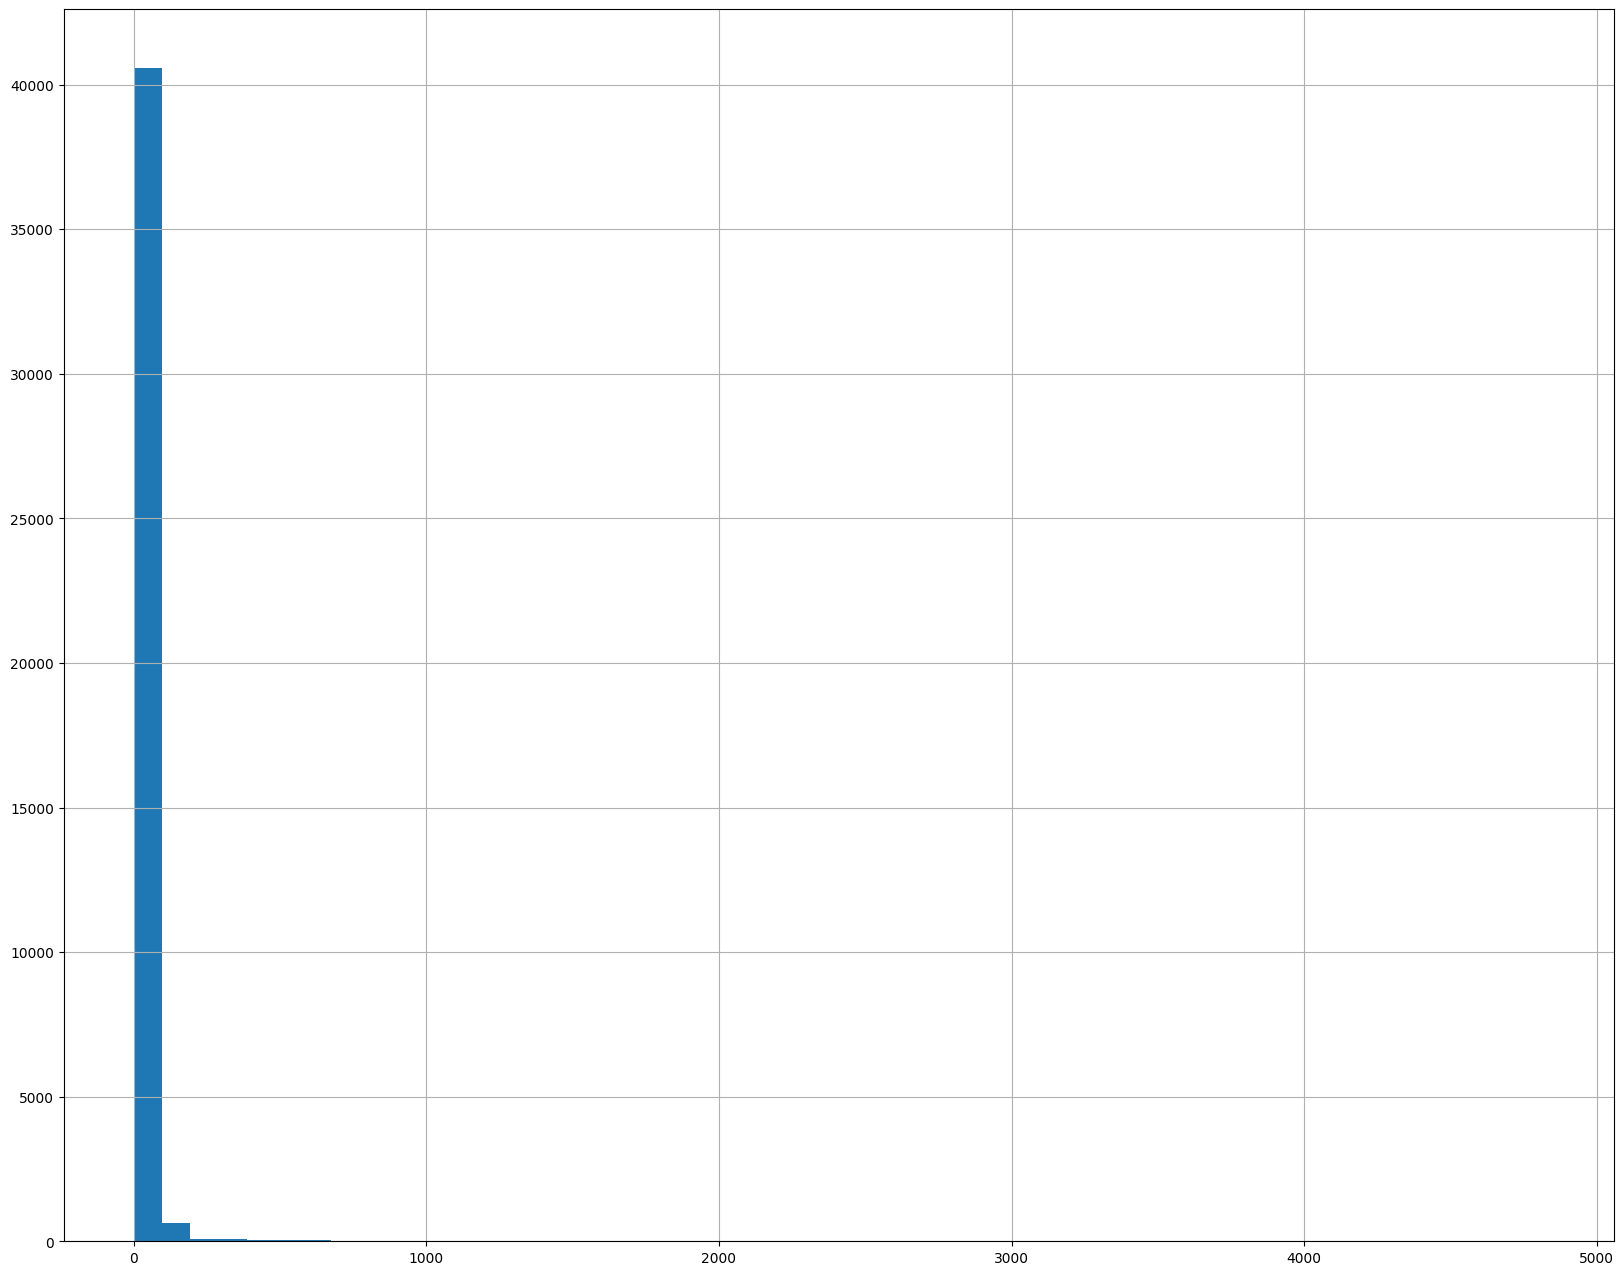

In [32]:
plt.figure(figsize=(20, 16))
df_copy['calls_count'].hist(bins=50)

На мой взгля аномалньое значение  количества звонков. Попробуем удалить эти значения по  95-му процентилю

In [33]:
# Пороговое значение по 95-му процентилю
threshold = df_copy['calls_count'].quantile(0.95)  
# Фильтрация данных по пороговому значению
df_copy = df_copy[df_copy['calls_count'] <= threshold]  

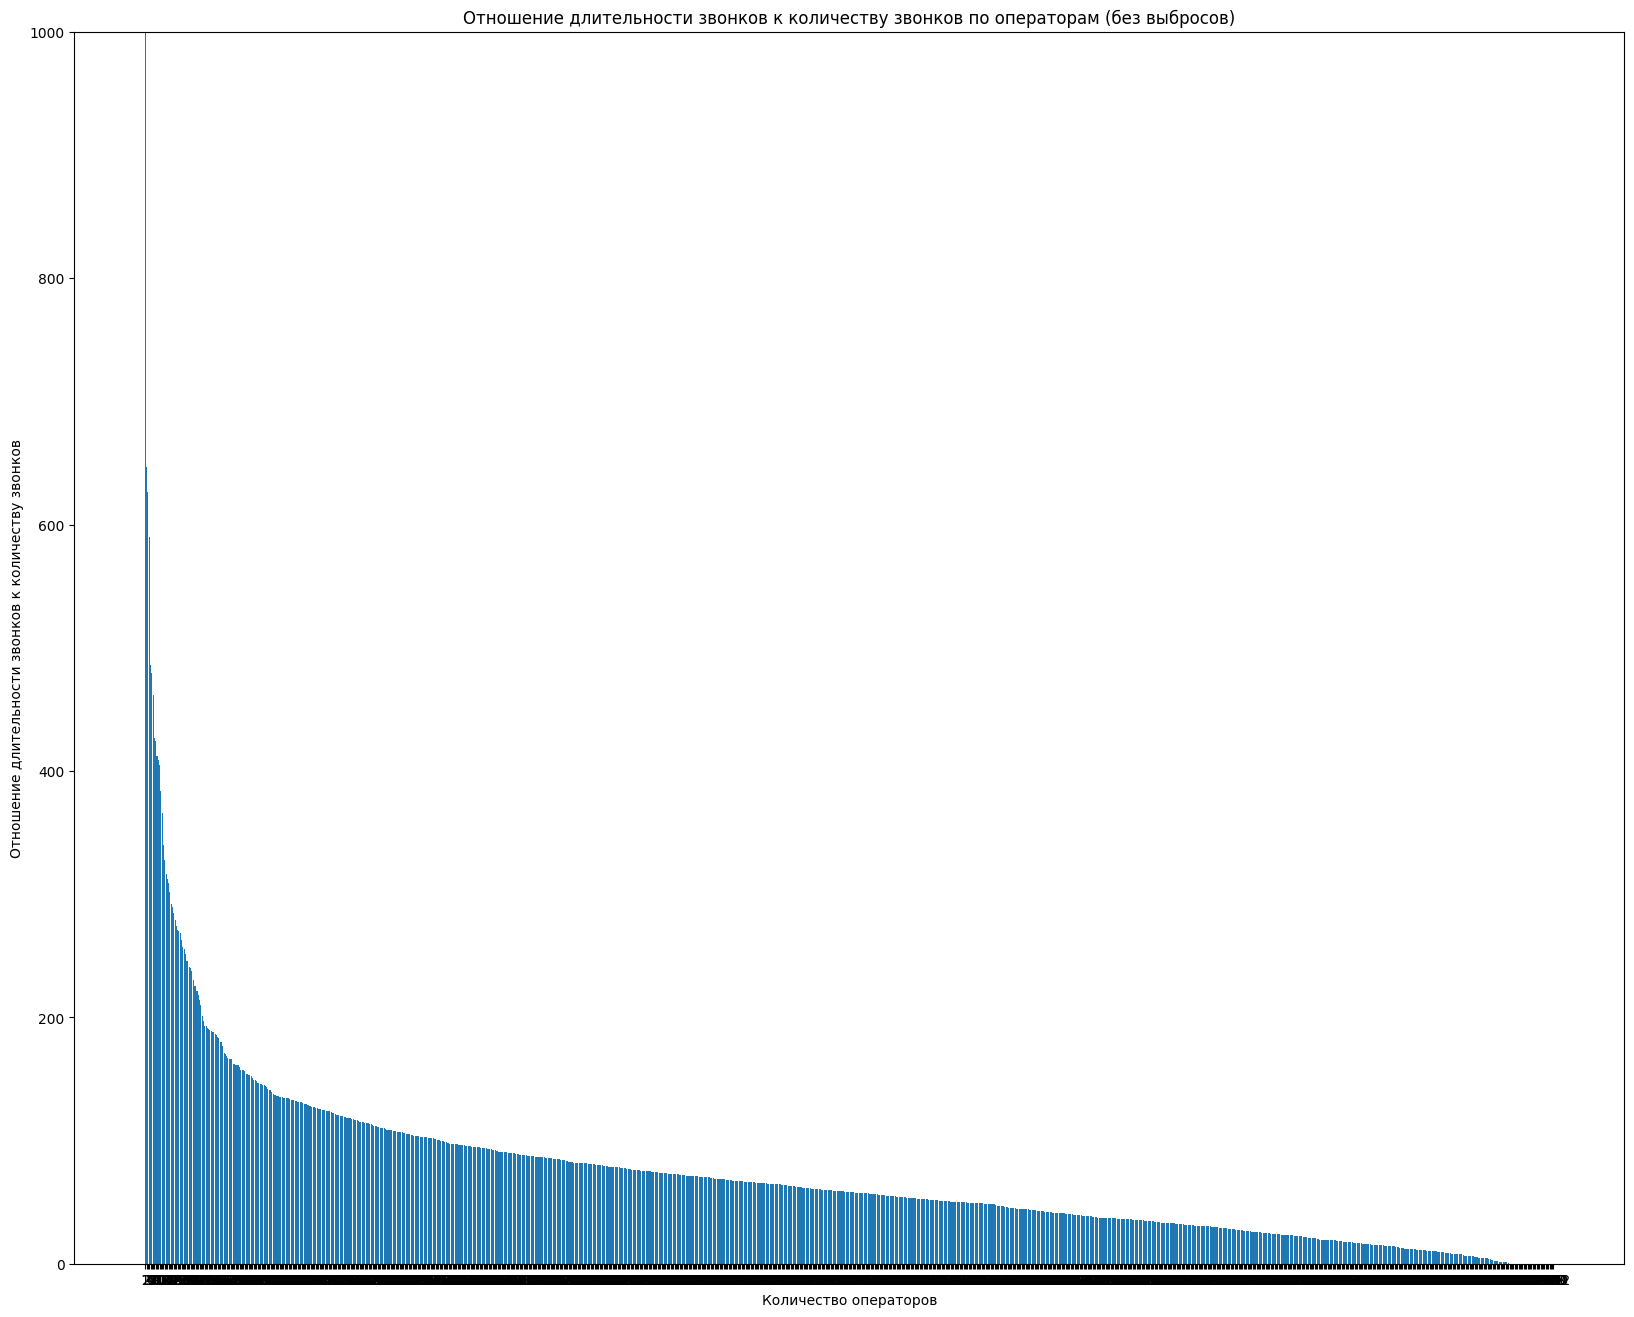

In [34]:
# Создание группировок по оператору продолжительности вызова и количества звонков
mean_duration_by_operator = df_copy.groupby('operator_id')['call_duration'].mean()
mean_calls_by_operator = df_copy.groupby('operator_id')['calls_count'].mean()
# Создание группировок и расчет отношения
df_ratio = pd.DataFrame({'operator_id': mean_duration_by_operator.index, 'ratio': mean_duration_by_operator / mean_calls_by_operator})
df_ratio.reset_index(drop=True, inplace=True)
df_ratio = df_ratio.sort_values('ratio', ascending=False)

# Построение графика
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_ratio)), df_ratio['ratio'])
plt.xlabel('Количество операторов')
plt.ylabel('Отношение длительности звонков к количеству звонков')
plt.title('Отношение длительности звонков к количеству звонков по операторам (без выбросов)')
plt.xticks(range(len(df_ratio)), range(1, len(df_ratio) + 1))
plt.ylim(0, 1000)  # Ограничение значений по оси Y до 900
plt.show()


Каждый столбец на графике соответствует определенному оператору.
Высота столбца представляет отношение длительности звонков к количеству звонков для данного оператора.
Чем выше столбец, тем больше отношение длительности звонков к количеству звонков у данного оператора.
Значения на оси X соответствуют номерам операторов.
Можно отслеживать изменения отношения по всем операторам и идентифицировать операторов с высоким или низким отношением.
Например, если столбец оператора №1 значительно выше остальных, это означает, что у этого оператора длительность звонков превышает количество звонков

In [35]:
df_ratio['ratio'].describe()

count    1092.000000
mean       73.295932
std        78.977812
min         0.000000
25%        30.547320
50%        58.173961
75%        91.245506
max      1306.000000
Name: ratio, dtype: float64

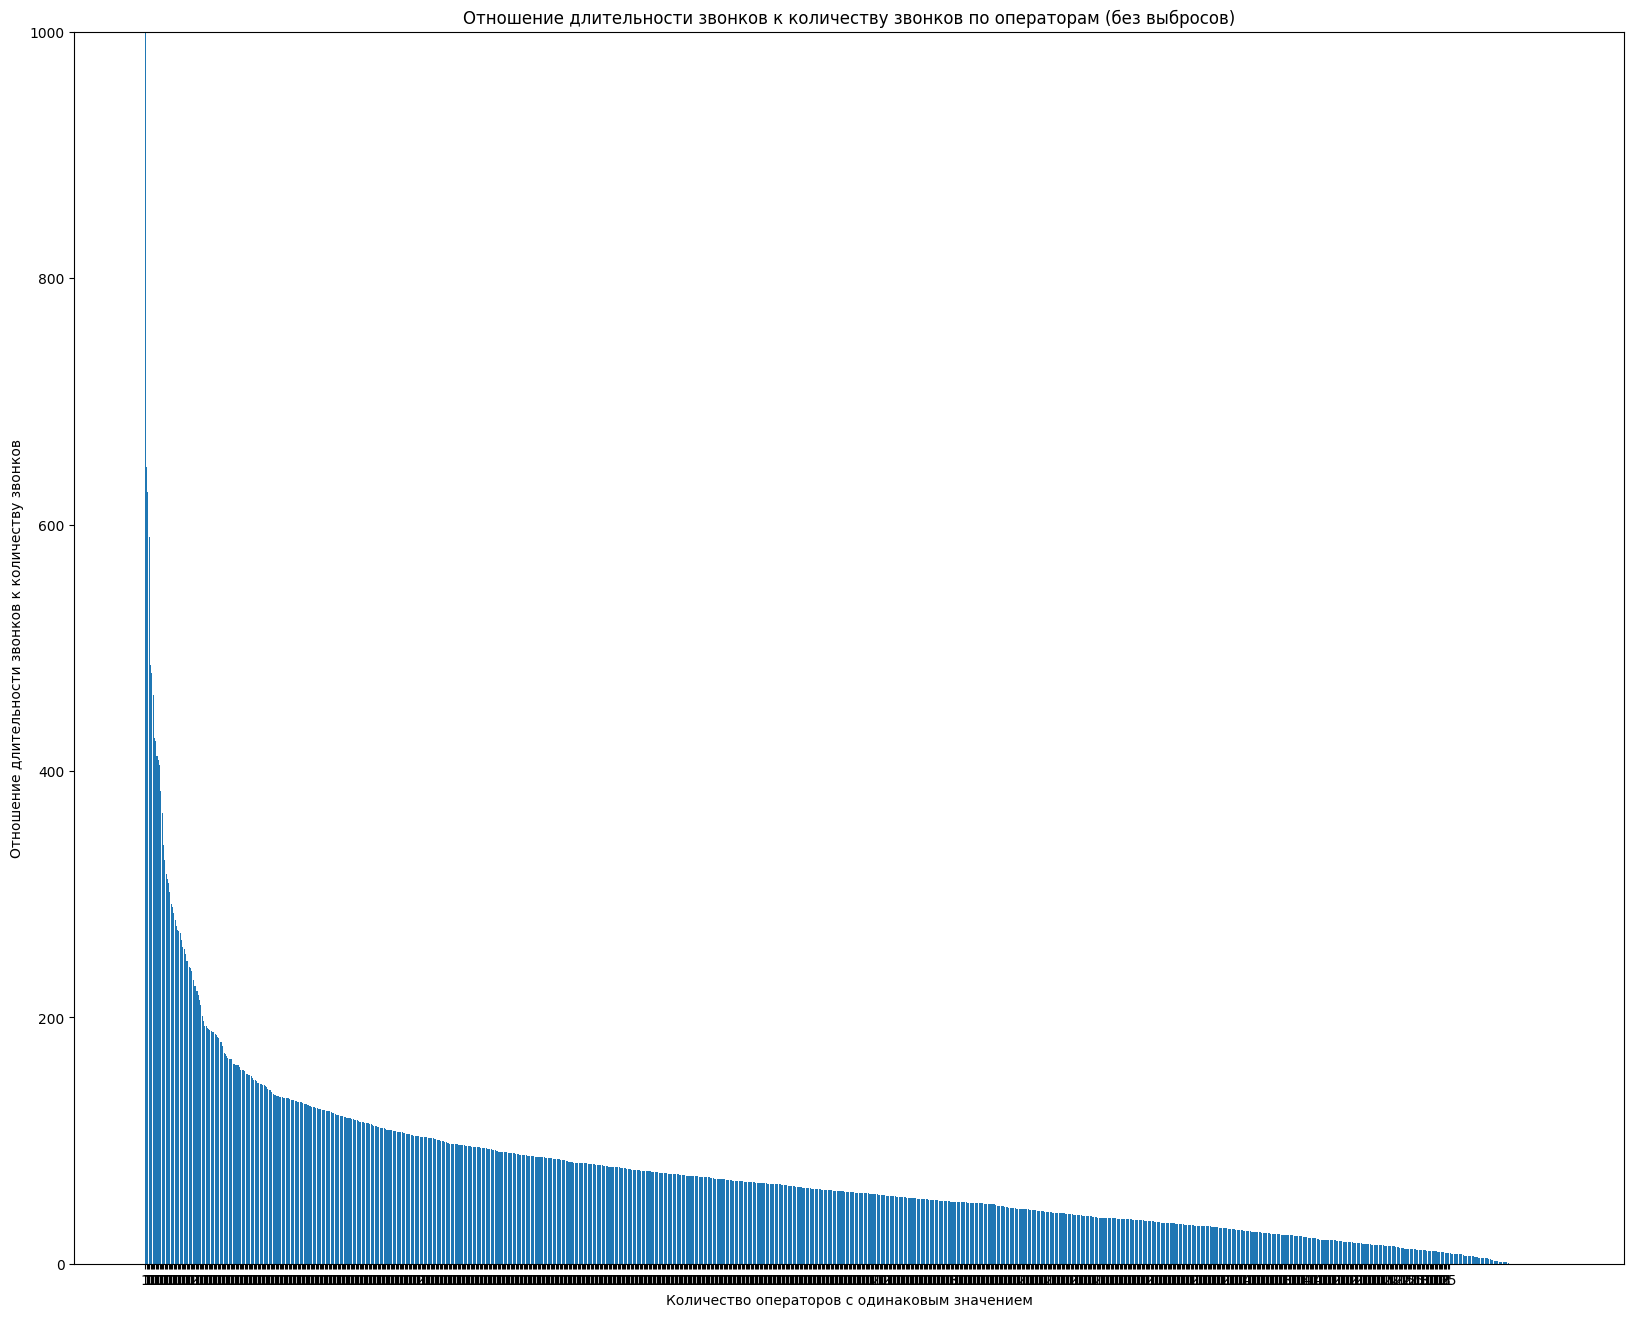

In [36]:
# Создание группировок по оператору продолжительности вызова и количества звонков
mean_duration_by_operator = df_copy.groupby('operator_id')['call_duration'].mean()
mean_calls_by_operator = df_copy.groupby('operator_id')['calls_count'].mean()

# Создание группировок и расчет отношения
df_ratio = pd.DataFrame({'operator_id': mean_duration_by_operator.index, 'ratio': mean_duration_by_operator / mean_calls_by_operator})
df_ratio.reset_index(drop=True, inplace=True)
df_ratio = df_ratio.sort_values('ratio', ascending=False)

# Построение графика
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_ratio)), df_ratio['ratio'])
plt.xlabel('Количество операторов с одинаковым значением')
plt.ylabel('Отношение длительности звонков к количеству звонков')
plt.title('Отношение длительности звонков к количеству звонков по операторам (без выбросов)')

# Задаем значения на оси X
unique_values = df_ratio['ratio'].unique()
xtick_labels = [len(df_ratio[df_ratio['ratio'] == val]) for val in unique_values]
plt.xticks(range(len(unique_values)), xtick_labels)

plt.ylim(0, 1000)  # Ограничение значений по оси Y до 900
plt.show()


Тут предполагаю что должен быть диапазон не короткий и не длинный разговор. Тут нужна будет обратная связь от руководителей КЦ для коррекции критерия ,но в тестовом варианте от 58 секунуд до 5 минут(300секунд) 

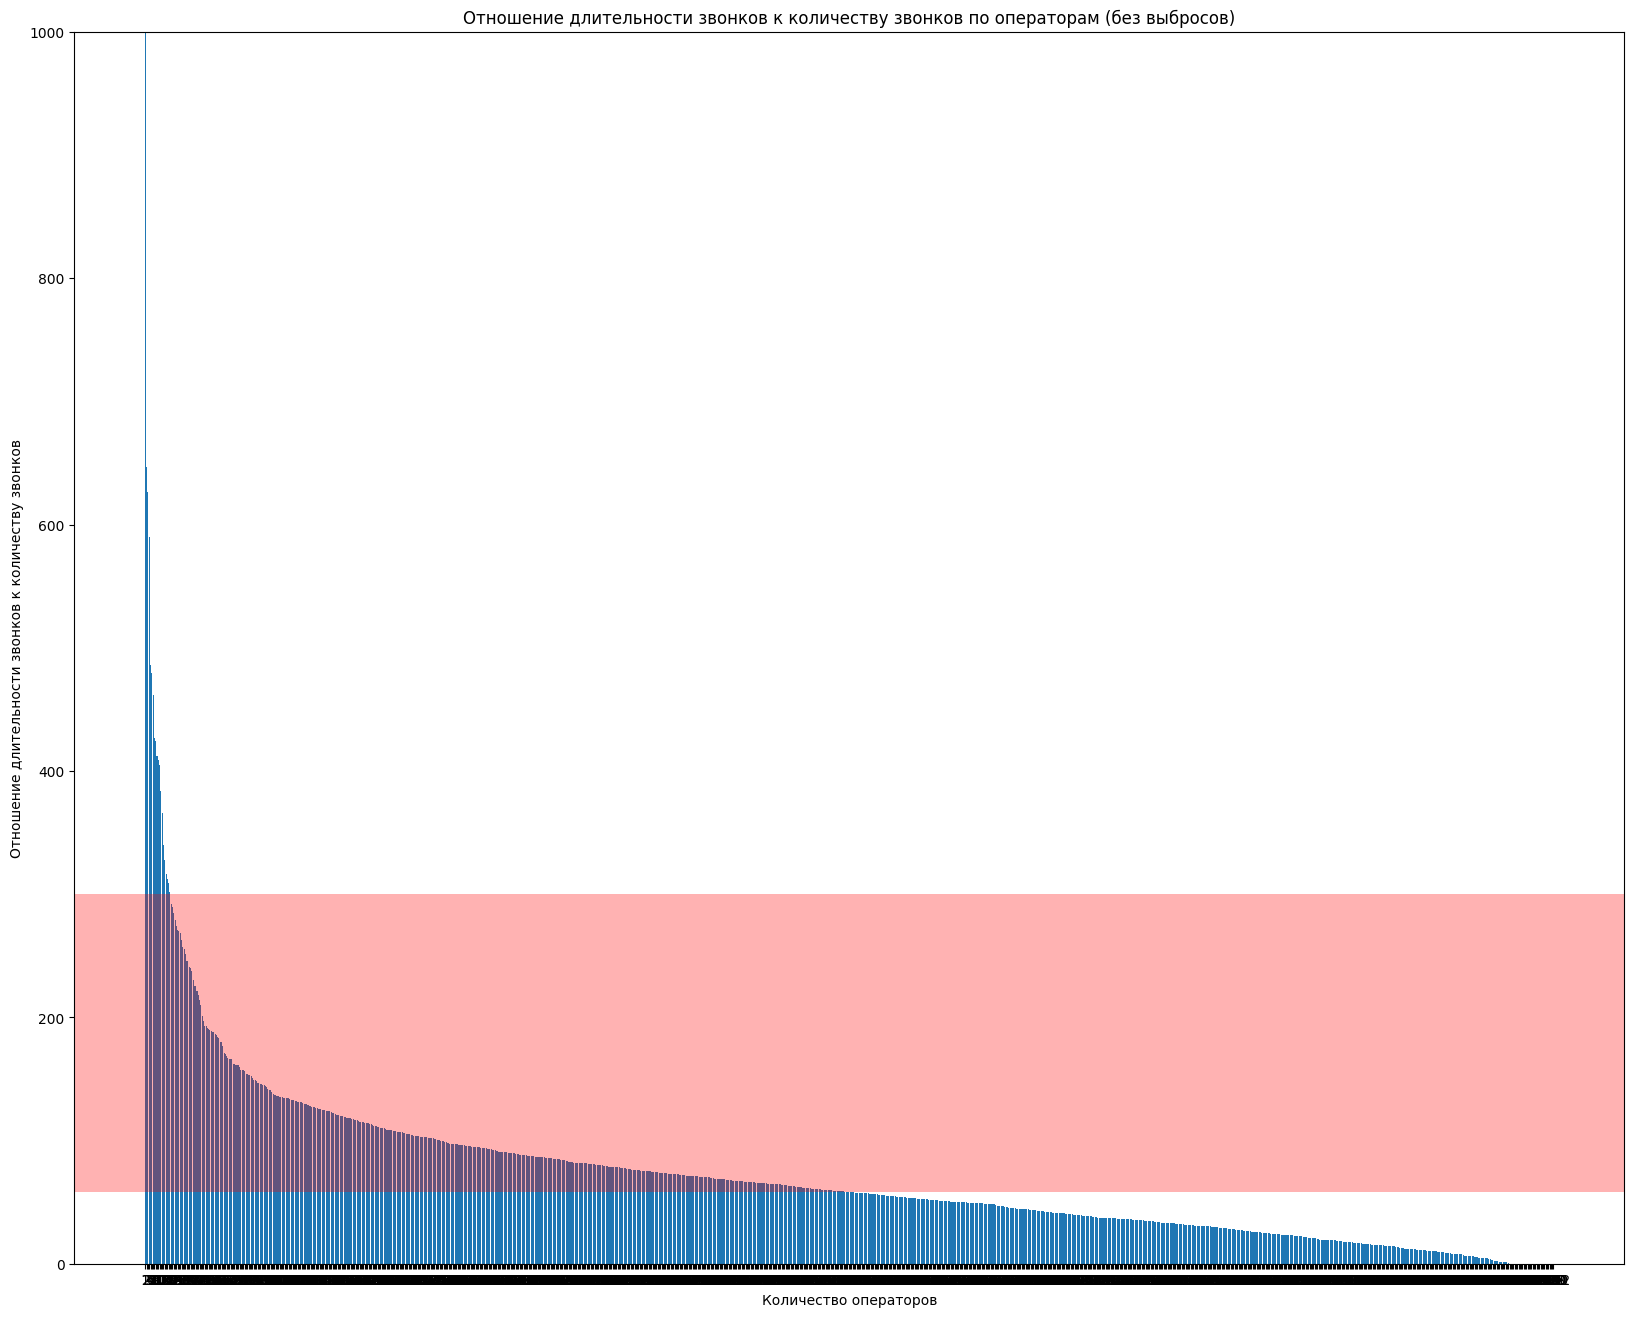

In [37]:
plt.figure(figsize=(20, 16))
plt.bar(range(len(df_ratio)), df_ratio['ratio'])
plt.xlabel('Количество операторов')
plt.ylabel('Отношение длительности звонков к количеству звонков')
plt.title('Отношение длительности звонков к количеству звонков по операторам (без выбросов)')
plt.xticks(range(len(df_ratio)), range(1, len(df_ratio) + 1))
plt.ylim(0, 1000)

# Закрашиваем диапазон от 58 до 91 по оси Y
plt.axhspan(58, 300, facecolor='red', alpha=0.3)

plt.show()



In [38]:
# Фильтрация данных по условию df_ratio['ratio'] 58-91

df_filtered_duration_ratio = df_ratio[(df_ratio['ratio'] >= 58) & (df_ratio['ratio'] <= 300)]

# Вычисление отношения в процентах
ratio_duration = round((len(df_filtered_duration_ratio) / 1092) * 100, 2)

# Вывод отношения
print("Отношение операторов, удовлетворяющих условию, к общему числу операторов:", ratio_duration, "%")



Отношение операторов, удовлетворяющих условию, к общему числу операторов: 48.35 %


3 критерий. Время разговора входящих, не пропущенных должно быть от 58-300секунды

####  Критерий КОЛИЧЕСТВО ИСХОДЯЩИХ

4 Критерий. Количество исходящих вызовов: Если колл-центр специализируется на обзвонах, то количество исходящих вызовов может быть показателем эффективности оператора. Можно проверить, сколько исходящих вызовов совершил каждый оператор и сравнить их количество.

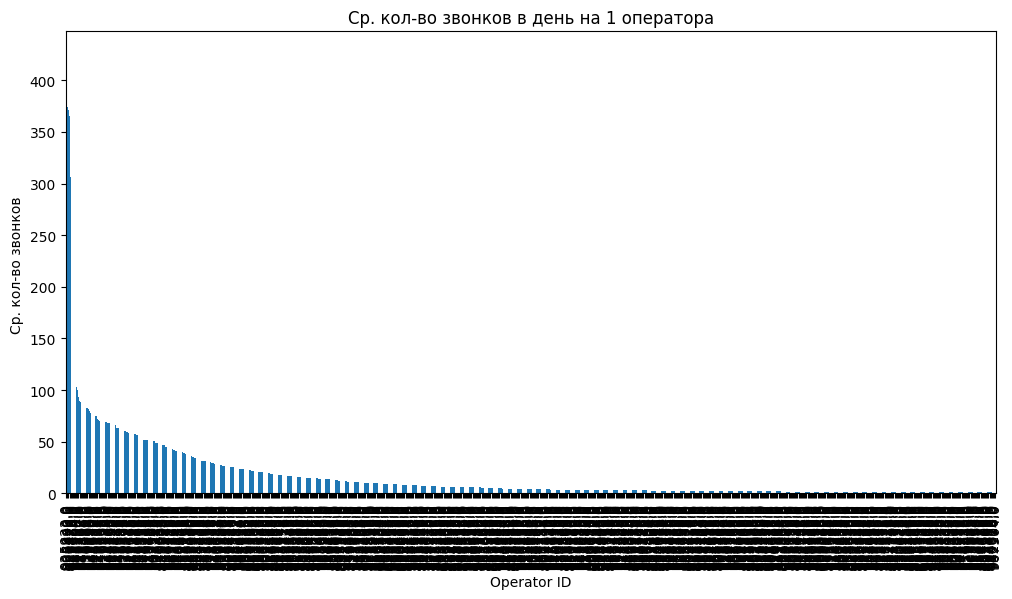

In [39]:
mean_calls_count = df[(df['direction'] == 'out') & (df['internal'] == 0)].groupby('operator_id')['calls_count'].mean()
mean_calls_count_sorted = mean_calls_count.sort_values(ascending=False)

mean_calls_count_sorted.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Operator ID')
plt.ylabel('Ср. кол-во звонков ')
plt.title('Ср. кол-во звонков в день на 1 оператора')
plt.show()

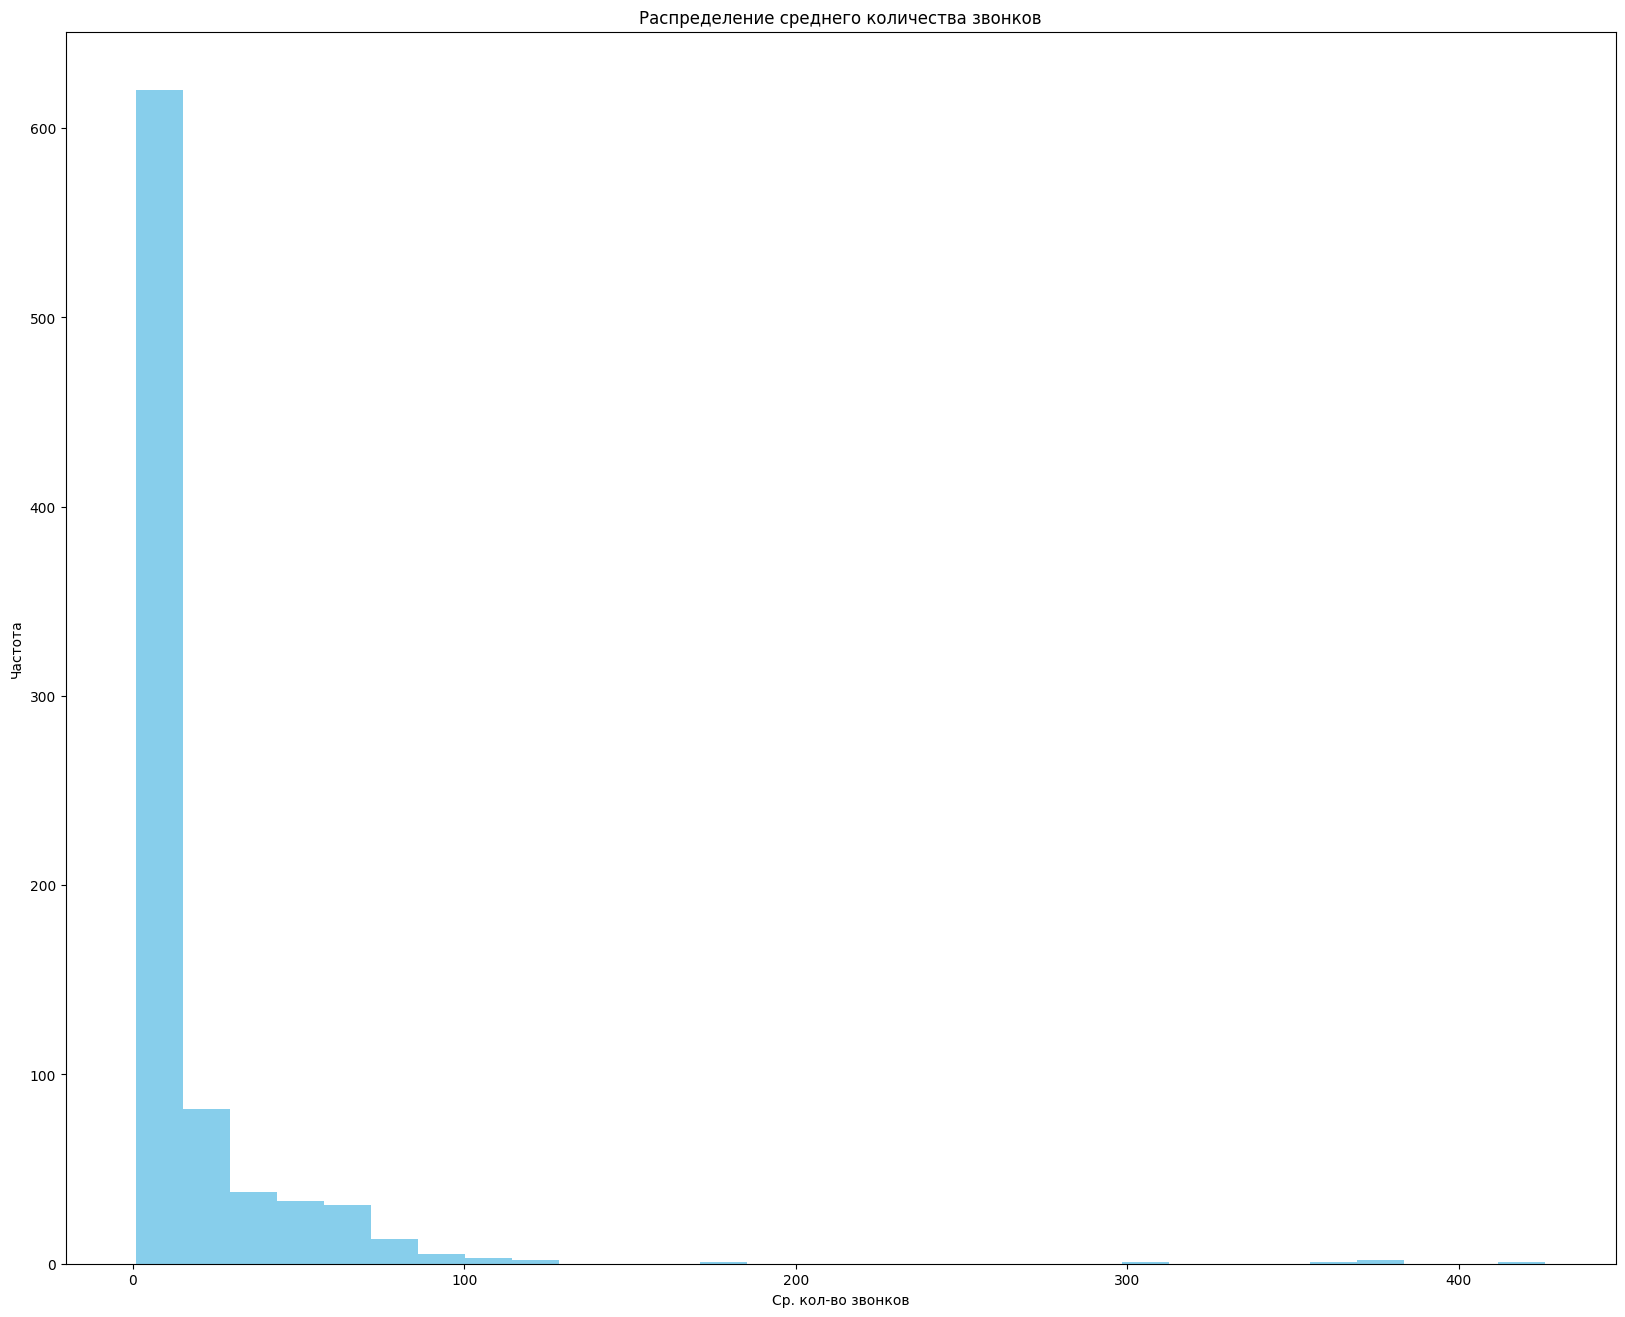

In [40]:
plt.figure(figsize=(20, 16))
plt.hist(mean_calls_count_sorted, bins=30, color='skyblue')
plt.xlabel('Ср. кол-во звонков')
plt.ylabel('Частота')
plt.title('Распределение среднего количества звонков')
plt.show()

In [41]:
mean_calls_count_sorted.describe()

count    833.000000
mean      16.125936
std       34.819520
min        1.000000
25%        2.000000
50%        4.018182
75%       15.934426
max      426.152174
Name: calls_count, dtype: float64

Максималньое значение 426 звонков. Это возможно выброс

In [42]:
mean_calls_count_filtered = mean_calls_count[mean_calls_count <= mean_calls_count.quantile(0.95)]
mean_calls_count_filtered.describe()

count    791.000000
mean      10.734089
std       14.723238
min        1.000000
25%        1.888889
50%        3.647059
75%       13.050000
max       66.720000
Name: calls_count, dtype: float64

Выставим критерий в значение которое операторы в 75% не достигают ,это значение 13 звонков в день.

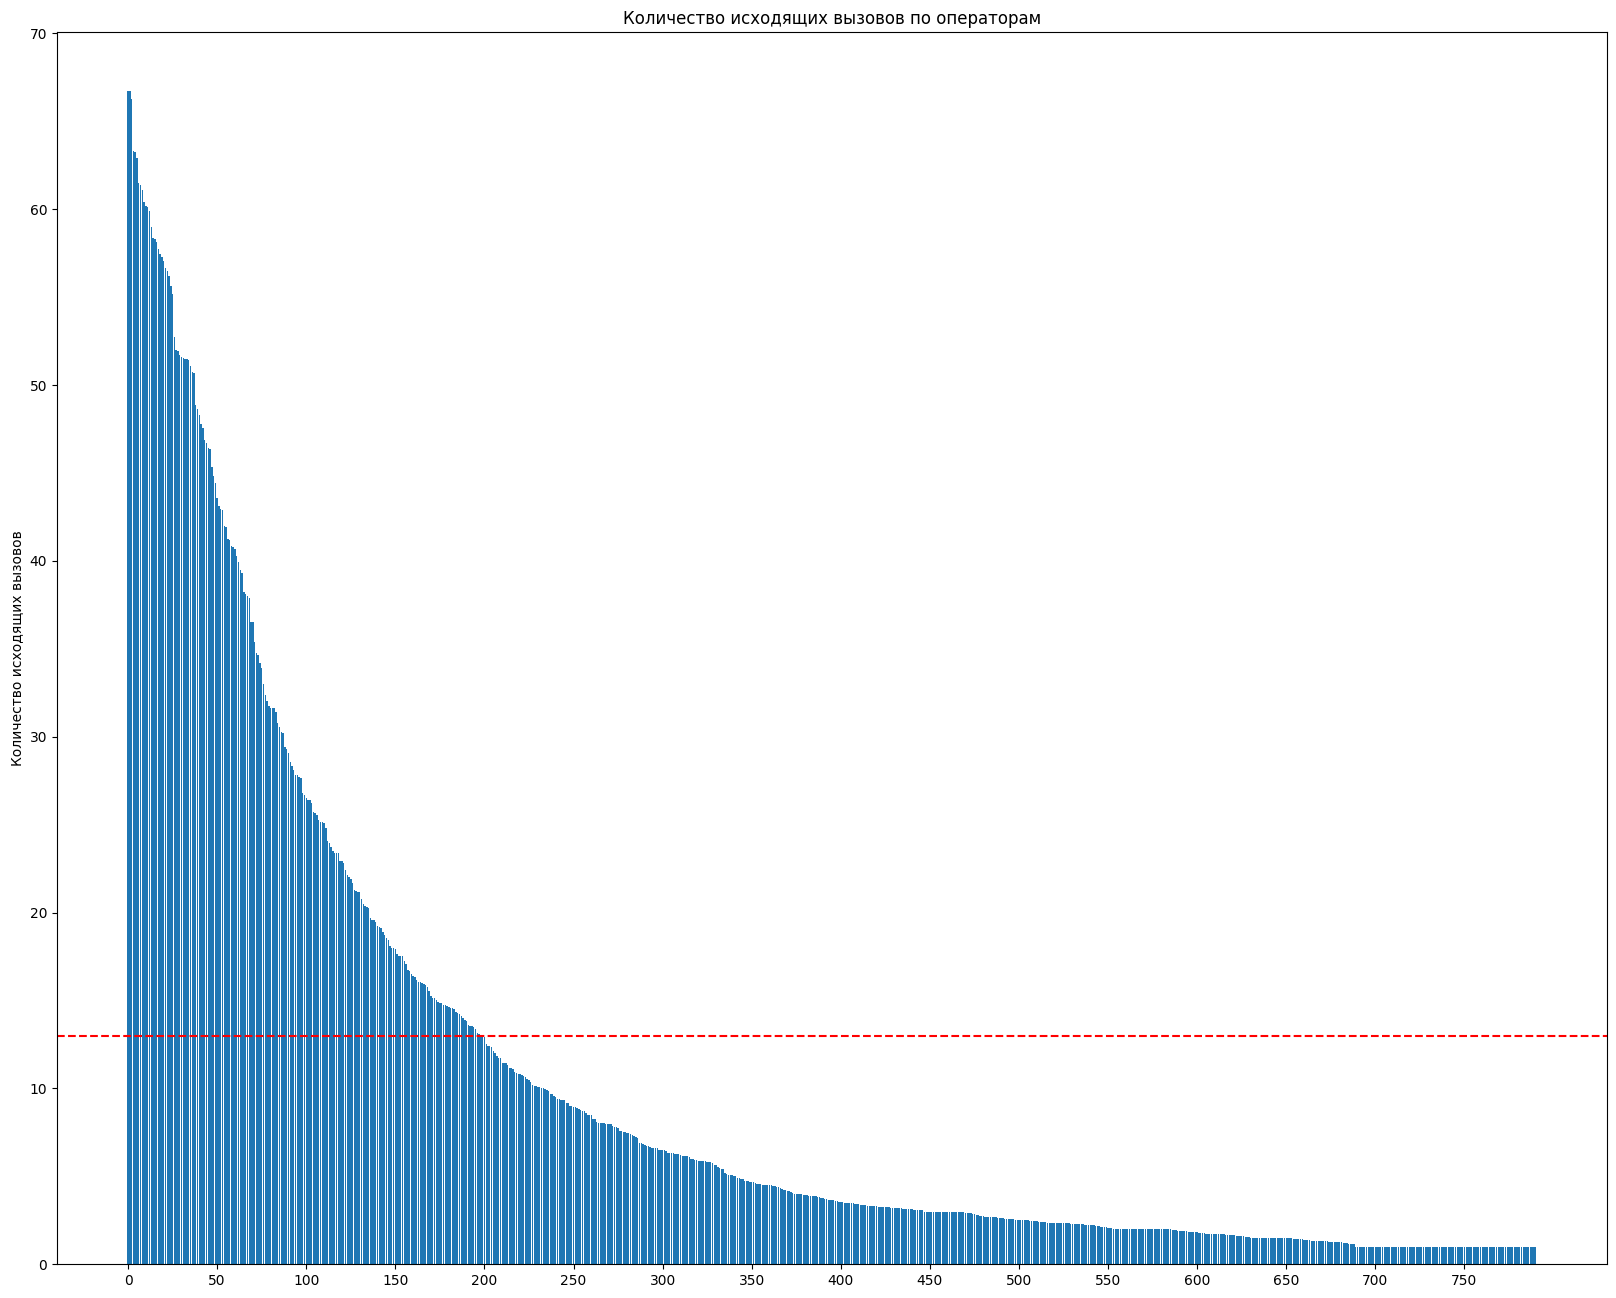

In [43]:
mean_calls_count_filtered = mean_calls_count_filtered.sort_values(ascending=False)
plt.figure(figsize=(20, 16))
plt.bar(range(len(mean_calls_count_filtered)), mean_calls_count_filtered)
plt.axhline(y=13, color='red', linestyle='--')  # Горизонтальная линия на уровне 472
plt.ylabel('Количество исходящих вызовов')
plt.title('Количество исходящих вызовов по операторам')
#plt.xticks(range(len(calls_count_by_operator_sorted)), calls_count_by_operator_sorted.values, rotation=45)
plt.xticks(range(0, len(mean_calls_count_filtered), 50))
plt.show()

### Итоговые критерии

Итоговый анализ критериев. 

1 % пропущеных ко всем принятым вызовам должен быть не менее 9.6 %

2 Время ожидания входящих не более 17.5 сек

3 Время разговора входящих, не пропущенных должно быть от 58-300 секунды

4 Для КЦ специализирущихся на исходящих это критерий 13 звонка в день.

Из этих параметров можно выстаивать систему KPI

In [44]:
# Фильтрация данных по критериям
filtered_operators = df_copy.loc[
    (df_ratio['ratio'] >= 58) & (df_ratio['ratio'] <= 300) &
    ((df_copy['total_call_duration'] - df_copy['call_duration']) < 17.5) &
    ((df_missed_calls_ratio['total_missed_calls'] / df_missed_calls_ratio['total_calls']) < 9.6)
]

# Подсчет количества уникальных операторов
num_operators = len(filtered_operators['operator_id'].unique())

# Вывод результата
print("Количество операторов, удовлетворяющих всем 3 критериям:", num_operators)




Количество операторов, удовлетворяющих всем 3 критериям: 10


## Гипотезы

Выдвинем 2 гипотезы:

1 гипотеза - о различии количества принятых вызовов в будни и выходные. 

2 гипотеза - о различии длительности ожидания ответа в будни и в выходные

Для анализа данной гипотезы можно применить следующие шаги:

Подготовка данных:

Создать новый столбец is_weekend, который будет указывать, является ли день выходным (например, значение True для субботы и воскресенья, и False для остальных дней).
Сгруппировать данные по is_weekend и подсчитать общее количество принятых вызовов в будни и выходные.
Проверка условий:

Проверить, являются ли распределения количества принятых вызовов в будни и выходные нормальными (например, с помощью критерия Шапиро-Уилка).
Если распределения являются нормальными, можно использовать t-тест для проверки различия средних значений количества принятых вызовов в будни и выходные.
Если распределения не являются нормальными, можно использовать непараметрический тест, например, критерий Манна-Уитни.
Анализ результатов:

Интерпретировать полученные статистические показатели и p-значение.
Если p-значение меньше выбранного уровня значимости (обычно 0.05), можно сделать вывод о статистически значимом различии количества принятых вызовов в будни и выходные.
Если p-значение больше выбранного уровня значимости, можно сделать вывод о отсутствии статистически значимого различия.

1 гипотеза - о различии количества принятых вызовов в будни и выходные.

In [45]:

# Создание столбца с информацией о выходных днях
df_copy['is_weekend'] = df_copy['date'].dt.dayofweek.isin([5, 6])

# Группировка данных и подсчет количества принятых вызовов в будни и выходные
calls_count_by_weekend = df_copy.groupby('is_weekend')['calls_count'].sum()

# Проверка нормальности распределений
weekday_calls = df_copy[df_copy['is_weekend'] == False]['calls_count']
weekend_calls = df_copy[df_copy['is_weekend'] == True]['calls_count']

# Shapiro-Wilk test
_, weekday_p_value = shapiro(weekday_calls)
_, weekend_p_value = shapiro(weekend_calls)

alpha = 0.05  # Уровень значимости

if weekday_p_value > alpha and weekend_p_value > alpha:
    # Используем t-тест для нормальных распределений
    _, p_value = ttest_ind(weekday_calls, weekend_calls)
else:
    # Используем критерий Манна-Уитни для ненормальных распределений
    _, p_value = mannwhitneyu(weekday_calls, weekend_calls)

# Анализ результатов
if p_value < alpha:
    print("Существует статистически значимое различие в количестве принятых вызовов в будни и выходные.")
else:
    print("Нет статистически значимого различия в количестве принятых вызовов в будни и выходные.")


Нет статистически значимого различия в количестве принятых вызовов в будни и выходные.


C:\Users\joyfr\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



2 гипотеза - о различии длительности ожидания ответа в будни и в выходные

In [46]:
import scipy.stats as stats

# Создание столбца 'is_weekend', указывающего, является ли день выходным
df_copy['is_weekend'] = df_copy['date'].dt.dayofweek.isin([5, 6])

# Фильтрация данных для будних дней
df_weekdays = df_copy[~df_copy['is_weekend']]
# Фильтрация данных для выходных дней
df_weekends = df_copy[df_copy['is_weekend']]

# Расчет длительности ожидания ответа для будних и выходных дней
wait_time_weekdays = df_weekdays['total_call_duration'] - df_weekdays['call_duration']
wait_time_weekends = df_weekends['total_call_duration'] - df_weekends['call_duration']

# Проверка нулевой гипотезы о равенстве средних значений длительности ожидания
statistic, p_value = stats.ttest_ind(wait_time_weekdays, wait_time_weekends, equal_var=False)

# Вывод результатов
if p_value < 0.05:
    print("Существует статистически значимое различие в длительности ожидания ответа между буднями и выходными.")
else:
    print("Нет статистически значимого различия в длительности ожидания ответа между буднями и выходными.")


Нет статистически значимого различия в длительности ожидания ответа между буднями и выходными.


Построим визуально как распределяется время ожиданиям по дням недели

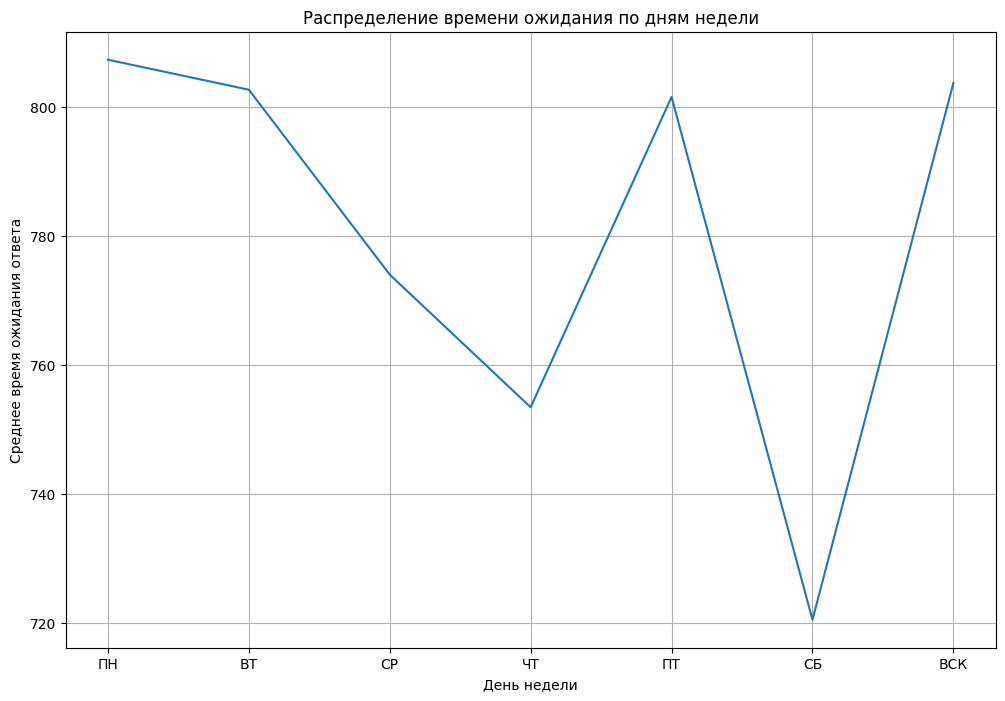

In [47]:
import matplotlib.pyplot as plt

# Группировка данных по дню недели и расчет среднего времени ожидания
mean_wait_time_by_weekday = df_copy.groupby(df_copy['date'].dt.dayofweek)['total_call_duration'].mean()

# Задание названий дней недели
weekday_names = ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВСК']

# Построение графика
plt.figure(figsize=(12, 8))
plt.plot(weekday_names, mean_wait_time_by_weekday)
plt.xlabel('День недели')
plt.ylabel('Среднее время ожидания ответа')
plt.title('Распределение времени ожидания по дням недели')
plt.grid(True)
plt.show()


мои рекомендации для КЦ проанализировать работу и эфективность работы операторов в будни, возможно не хватает штатной еденицы в раб день, если хотят изменить параметр время ожидание в будни в лучшую сторону. В пятницу скорее всего низкое значение обусловлено большим числом штата на линии

# Выводы

Определили 3 критерия эфективности операторов, по относительному количеству проущеных, дилтелньости ожидания входящих,и времени разговора, а так же для исходящих вызовов количество совершенных в день. Текущие критерии явлются теоретическими и что бы их подстаривать под реалии бизнеса необходимо получить больше вводных таких как  требуемая длителньость разговора. Но эти данные проанализированы на широкой выборке и представляют собой действителньо то к чему стоит стремиться. Эти данные позволят менеджерам приимать решения по улучшению своего сервиса. Наш сервис НУ ПОЗОНИ определенно показывает текущее положение дел и дает возможности сделать шаги бинесу в правильном направлении.

На основании проведенного анализа данных можно сделать следующие выводы:

Количество принятых вызовов в будни и выходные дни не имеет статистически значимого различия. Это означает, что с точки зрения количества принятых вызовов, рабочие дни и выходные дни могут быть схожими.

Однако, длительность ожидания ответа на вызовы демонстрирует статистически значимое различие между будними и выходными днями. Это может указывать на различия в нагрузке или организации работы операторов в разные дни недели.

Данные выводы могут помочь понять, как различные факторы, такие как день недели, могут влиять на работу операторов и качество обслуживания вызовов. Это может быть полезной информацией при принятии решений о планировании ресурсов и оптимизации работы контактного центра.

Презентация

https://docs.google.com/presentation/d/1ARQoDMgx6Ij-d1XyJNglZAXcOssUoDQ379C-1jOrLks/edit?usp=sharing

ссылка на дашборд 

https://public.tableau.com/app/profile/.37513921/viz/Finaltelecom/Dashboard1?publish=yes

